<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [Folding a Light Curve](01.03-Folding-A-Lightcurve.ipynb) | [Contents](index.ipynb) | [Limb Darkening](01.05-Limb-Darkening.ipynb) >

# What are Light Curve Files?

In the previous notebook we looked at Target Pixel Files, which show how each individual pixel from the spacecraft behaved. Now we are going to look at a light curve file from MAST. These have been built by MAST from TPFs by summing up the pixels in the aperture and correcting for spacecraft systematics and cosmic rays. 

(Some more details of how TPFs are turned into light curve files can be found in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf).)

Let's take a look at the light curve file now.

In [5]:
from astropy.io import fits
h = fits.open('data/kplr006922244-2010078095331_llc.fits')
h[1].data.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

The same as with the target pixel file, the data is in the second extension of the fits file. Note that the TIME in these files is given in Barycentric Julian Date - 2454833.  

This time we have two types of 'FLUX' to choose from. *SAP_FLUX* and *PDCSAP_FLUX*. These are defined as:

* SAP FLUX: Simple Aperture Photometry Flux. 
* PDCSAP FLUX: Pre-search Data Conditioning SAP Flux. 

SAP flux is built using the aperture we saw in the previous file, by summing all of the flux in the pixels that fall within the aperture. The PDCSAP flux is built in the same aperture, and then further corrected based on the behavior of other sources on the focal plane. Trends that are common with many nearby stars are fit and removed Cotrending Basis Vectors (CBVs). (You can read more about this process in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf).)

Let's plot both:

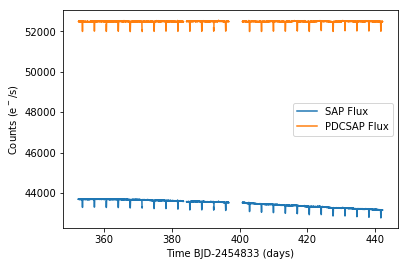

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(h[1].data['TIME'],h[1].data['SAP_FLUX'],label='SAP Flux')
plt.plot(h[1].data['TIME'],h[1].data['PDCSAP_FLUX'],label='PDCSAP Flux')
plt.legend()
plt.xlabel('Time BJD-2454833 (days)')
plt.ylabel('Counts (e$^-$/s)')

These two fluxes are very different, with the *PDCSAP_FLUX* having more counts and no long term trend. We will look more into the details of which 'FLUX' we should use for each application in a later notebook. For now, we will use the PDCSAP flux. This should be a more accurate representation of the true flux of this star.

<!--NAVIGATION-->
< [Folding a Light Curve](01.03-Folding-A-Lightcurve.ipynb) | [Contents](index.ipynb) | [Limb Darkening](01.05-Limb-Darkening.ipynb) >